## Lab5

### Desarrollado por:
- Alejandro Gómez
- Gabriela Contreras
- Roberto Vallecillos

### Exploración de datos

** KNN MODEL **

In [2]:
# Librerias a usar

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.metrics import confusion_matrix
import math

In [3]:
# Cargar el dataset

phishing = pd.read_csv('dataset_phishing.csv')

# Ver las primeras 5 filas
phishing.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


<Axes: >

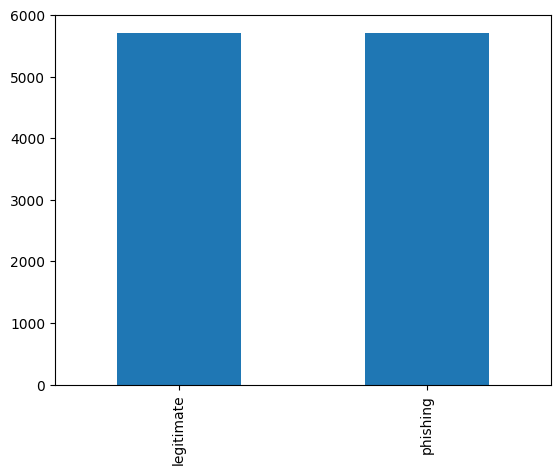

In [3]:
# Gráficos exploratorios

phishing['status'].value_counts()
phishing['status'].value_counts().plot(kind='bar')

Se observa que la data está balanceada con 50% de phishing y 50% de datos reales.
Con esto podemos saber que, la data no tiene ningún tipo de bias, ni es necesario cambiar el sampling de esta. Así que, podemos decir que es un dataste balanceado, desde el contexto del phishing, lo cual nos interesa analizar para este laboratorio.

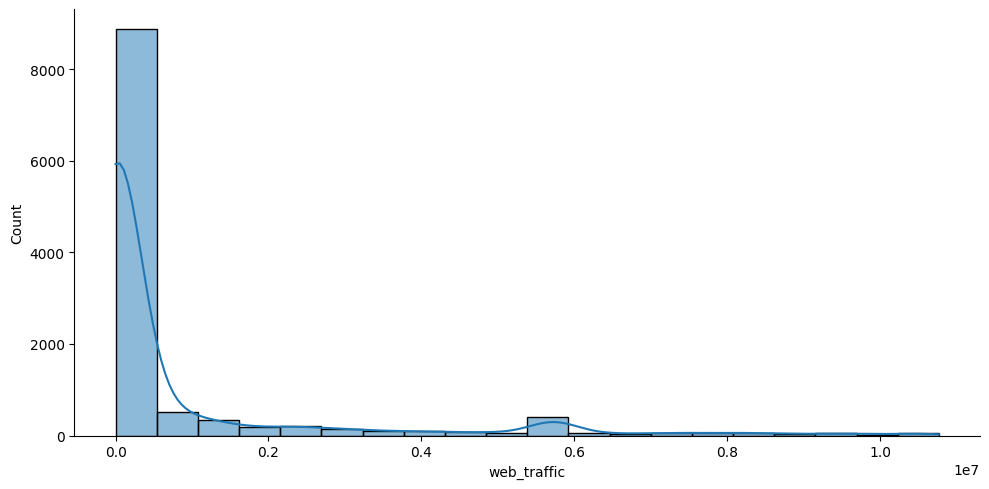

In [4]:
# Gráficos exploratorios
sns.displot(phishing['web_traffic'], kde=True, bins=20, height=5, aspect=2)


In [4]:
# Ver la correlación entre las variables
phishing.corr()

C:\Users\Contreras GP\AppData\Local\Temp\ipykernel_30352\959754570.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  phishing.corr()


,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
length_url,1.000000,0.223025,0.453961,0.443589,0.399564,0.150739,0.520930,0.576268,NaN,0.621745,...,0.041879,0.125159,-0.006476,-0.007082,0.002799,-0.006798,0.072205,0.023357,0.236395,-0.102582
length_hostname,0.223025,1.000000,0.252013,0.408956,0.057702,0.071793,0.162400,0.145617,NaN,0.183405,...,-0.015054,0.217284,0.074707,-0.097794,-0.041081,0.013854,0.163238,-0.023344,0.213990,-0.159342
ip,0.453961,0.252013,1.000000,0.288398,0.109860,0.059401,0.405434,0.383262,NaN,0.440972,...,0.037971,0.137716,0.014561,0.053246,-0.108869,-0.077020,0.167930,0.127823,0.270743,-0.218968
nb_dots,0.443589,0.408956,0.288398,1.000000,0.045099,0.263283,0.347411,0.435798,NaN,0.414902,...,0.040875,0.107789,0.055560,0.056407,-0.024117,-0.007818,0.087969,0.126659,0.209616,-0.097312
nb_hyphens,0.399564,0.057702,0.109860,0.045099,1.000000,0.018770,0.036804,0.120487,NaN,0.107050,...,-0.033302,0.006909,0.020297,-0.055794,0.038163,0.080104,-0.041464,-0.031477,-0.018828,0.104341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
domain_age,-0.006798,0.013854,-0.077020,-0.007818,0.080104,-0.067334,-0.045623,-0.043933,NaN,-0.039726,...,-0.069671,-0.174976,0.051116,-0.275520,0.269109,1.000000,-0.096698,-0.068023,-0.210111,0.589602
web_traffic,0.072205,0.163238,0.167930,0.087969,-0.041464,-0.009459,0.143777,0.164797,NaN,0.187809,...,-0.030888,0.081786,0.083888,0.022598,-0.110435,-0.096698,1.000000,-0.007113,0.034099,-0.209526
dns_record,0.023357,-0.023344,0.127823,0.126659,-0.031477,0.031611,0.009441,0.076372,NaN,0.052159,...,0.006232,0.062084,0.043817,0.213899,-0.060811,-0.068023,-0.007113,1.000000,0.096413,-0.142135
google_index,0.236395,0.213990,0.270743,0.209616,-0.018828,0.113217,0.201260,0.129093,NaN,0.167385,...,0.208367,0.267465,-0.143655,0.040633,-0.134656,-0.210111,0.034099,0.096413,1.000000,-0.389887


In [6]:

# Tipos de datos en columnas
intConteo = 0
stringConteo = 0
floatConteo = 0
for i in phishing.columns:
   
    if phishing[i].dtype == 'int64':
        intConteo += 1
    if phishing[i].dtype == 'object':
        stringConteo += 1
    if phishing[i].dtype == 'float64':
        floatConteo += 1
        
print('Cantidad de variables tipo int: ', intConteo)
print('Cantidad de variables tipo string: ', stringConteo)
print('Cantidad de variables tipo float: ', floatConteo)
print('\nTotal de variables clasificadas: ', intConteo + stringConteo + floatConteo)

print("Total columnas en dataset:" , phishing.shape[1])

Cantidad de variables tipo int:  74
Cantidad de variables tipo string:  2
Cantidad de variables tipo float:  13

Total de variables clasificadas:  89
Total columnas en dataset: 89


In [5]:
# Encoding de variables (para status)
encoder = LabelEncoder()
phishing["status"] = encoder.fit_transform(phishing["status"])



In [6]:
# Eliminar columnas que no aportan información

# Eliminar columna url
phishing.drop(['url'], axis=1, inplace=True)


In [7]:
# Escalar variables

escalar = StandardScaler()

dataEscalada = escalar.fit_transform(phishing)

minMax = MinMaxScaler()

dataEscaladaMinMax = minMax.fit_transform(phishing)

In [8]:
for y in (phishing.columns.tolist()):
    if len(phishing[y].value_counts()) == 2:
        valores = phishing[y].value_counts()[1] / phishing[y].value_counts()[0]

In [9]:
columnasVacias = phishing.isna().any()
dataSetProcesado = phishing.drop(columnasVacias[columnasVacias].index, axis=1)

In [10]:
# Separar en train y testing
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(dataSetProcesado, phishing['status'], test_size=0.2, random_state=42)

In [11]:
# K-Nearest Neighbors
def knn_fit(X_train, y_train, k=3):
    return X_train, y_train, k
    
def knn_predict(X_test, X_train, y_train, k=3):    
    predictions = []
    for __, x in X_test.iterrows():
        distances = np.sqrt(np.sum((X_train - x)**2, axis=1))
        k_nearest_indices = np.argpartition(distances, k)[:k]
        k_nearest_labels = y_train.iloc[k_nearest_indices]
        label = k_nearest_labels.mode()[0]
        predictions.append(label)
    return predictions

    
def knn_accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

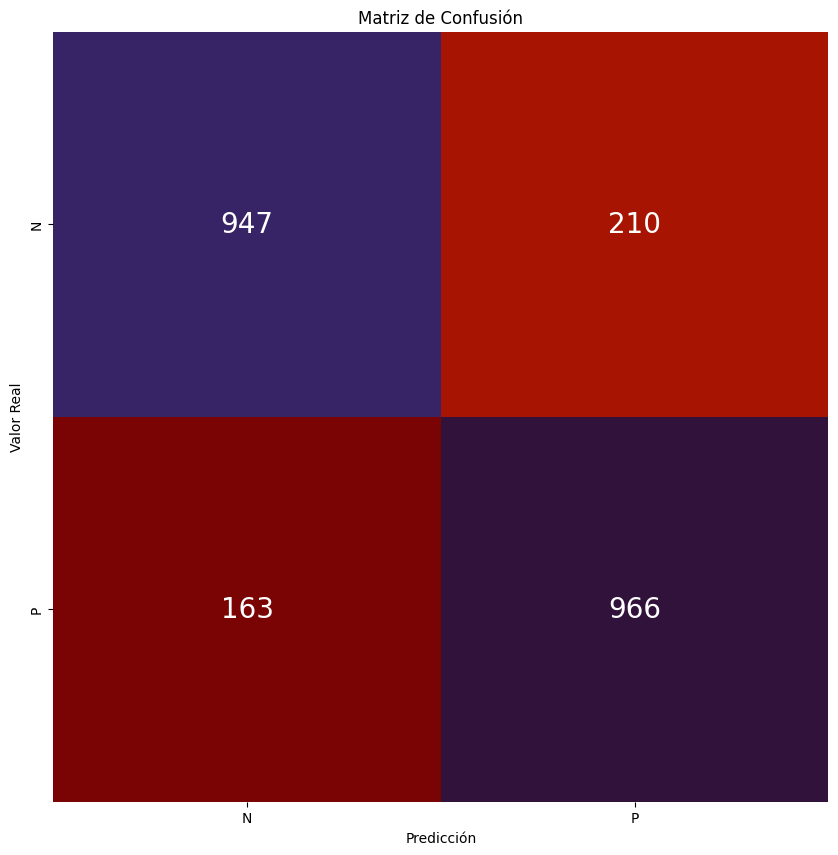

In [12]:

# Data de entrenamiento, etiquetas
X_train, y_train, k = knn_fit(X_train, y_train, k=3)
y_pred = knn_predict(X_test, X_train, y_train, k=3)

# Accuracy
accuracy = knn_accuracy(y_test, y_pred)
# Matriz de confusión
conf_mat = confusion_matrix(y_test, y_pred)

# Gráfico
fig, ax = plt.subplots(figsize=(10,10))
# Heatmap usado para visualizar la matriz de confusión
sns.heatmap(conf_mat, annot=True, cmap=plt.cm.turbo_r, cbar=False, ax=ax, fmt='g', annot_kws={"size": 20}, 
            xticklabels=['N', 'P'], yticklabels=['N', 'P'])
# Etiquetas
ax.set_xlabel('Predicción')
ax.set_ylabel('Valor Real')
ax.set_title('Matriz de Confusión')
# Mostrar gráfico
plt.show()



In [13]:
#Metrica de desempeño 
print(f"Accuracy: {accuracy}")

Accuracy: 0.836832895888014


In [46]:
# Uso de librerias 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


X_train, X_test, y_train, y_test = train_test_split(dataSetProcesado, phishing['status'], test_size=0.2, random_state=42)
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

print('--- MATRIZ DE CONFUSION ---\n')
print(confusion_matrix(y_test,pred))

print('\n--- REPORTE DE CLASIFICACION --- ')
print(classification_report(y_test,pred))

--- MATRIZ DE CONFUSION ---

[[935 222]
 [149 980]]

--- REPORTE DE CLASIFICACION --- 
              precision    recall  f1-score   support

           0       0.86      0.81      0.83      1157
           1       0.82      0.87      0.84      1129

    accuracy                           0.84      2286
   macro avg       0.84      0.84      0.84      2286
weighted avg       0.84      0.84      0.84      2286



** SVM MODEL **

In [14]:
import seaborn as sns
%matplotlib inline
dfphis = pd.read_csv('dataset_phishing.csv')

dfphis_Array = dfphis.values

dfphis["status"] = dfphis["status"].map({"legitimate": 1, "phishing": -1})
dfphis["status"].value_counts()


 1    5715
-1    5715
Name: status, dtype: int64

In [15]:

dataSetProcesado = dfphis.drop('url', axis=1)
from sklearn.preprocessing import StandardScaler, MinMaxScaler

corr = dfphis.corr()
escalar = StandardScaler()

dataEscalada = escalar.fit_transform(dataSetProcesado)

minMax = MinMaxScaler()

dataEscaladaMinMax = minMax.fit_transform(dataSetProcesado)
dataEscaladaMinMax.T[-1] = dataEscaladaMinMax.T[-1] * 2 -1
vmax = 1

corr.style.background_gradient(cmap='coolwarm', vmin=-vmax, vmax=vmax)

C:\Users\Contreras GP\AppData\Local\Temp\ipykernel_30352\2067605396.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dfphis.corr()


In [16]:
class SVM:
    def __init__(self, C = 5.0, kernel = None, degree=2):
        self.kernel = kernel
        self.C = C
        self.w = 0
        self.b = 0
        self.degree = degree
    
    #Función de perdida
    def loss(self, w,b,x,y):
        reg = 0.5 * (w*w)
        for i in range(x.shape[0]):
            #Termino de optimización
            opt = y[i] * ((np.dot(w,x[i]))+b)
            loss = reg + self.C * max(0, 1-opt)
        return loss[0][0]
    def transform_poly(self, X, y=None):
            #Función de transformación del kernel polinomial.
            X['x1^2'] = X['length_url'] ** self.degree
            X['x2^2'] = X['longest_words_raw'] ** self.degree
            X['x3^2'] = X['avg_words_raw'] ** self.degree
            X['x4^2'] = X['avg_word_path'] ** self.degree
            X['x5^2'] = X['longest_word_path'] ** self.degree
            X['x1 * x2 * x3 * x4 * x5'] = X['length_url'] * X['longest_words_raw']* X['avg_word_path'] * X['longest_word_path']*X['avg_words_raw']
            X = X.to_numpy()
            if y.size != 0:
                y = y.to_numpy()
                return X, y
            else:
                return X
    #Función de predicción
    def fit(self, X, y, batch = 100, lr =0.001, epoch = 10):
        if(self.kernel == "poly"):
            X, y = self.transform_poly(X, y)
            
        elif(self.kernel == "linear"):
            X = X.to_numpy()
            y = y.to_numpy()
        #Transformación de datos basado en el kernel 
        features = X.shape[1]
        samples = X.shape[0]

        c = self.C

        ids = np.arange(samples)
        np.random.shuffle(ids)

        #Creación de nuevo arrglo basado en arreglos
        w = np.zeros((1, features))
        b = 0
        losses = []

        for i in range(epoch):
            l = self.loss(w,b,X,y)
            losses.append(l)

            #Calculo de gradiente y de la derivada de b y w
            for batchi in range(0, samples, features):
                dw = 0
                db = 0

                #Iteraciones por partes, desde zero
                for j in range(batchi, batchi+batch):
                    if j< samples:
                        x = ids[j]
                        ti = y[x] * (np.dot(w, X[x].T)+b)

                        if ti> 1:
                            dw +=0
                            db +=0

                        else:
                            dw += c * y[x] * X[x]
                            db += c * y[x]


                #Calculo de los pesos
                w = w - lr * w +lr *dw
                b = b + lr * db


        self.w = w
        self.b = b

        return self.w, self.b, losses
    
    #Función de predicción
    def predict(self, X):
        if(self.kernel == "poly"):
            X = self.transform_poly(X, np.array([]))
        elif(self.kernel == "linear"):
            X.to_numpy()
        prediction = np.dot(X,self.w[0])+self.b
        return np.sign(prediction)



In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Normalización de los datos
dfphis['length_url'] = (dfphis['length_url'] - dfphis['length_url'].mean()) / dfphis['length_url'].std()  
dfphis['longest_words_raw'] = (dfphis['longest_words_raw'] - dfphis['longest_words_raw'].mean()) / dfphis['longest_words_raw'].std()  
dfphis['longest_word_path'] = (dfphis['longest_word_path'] - dfphis['longest_word_path'].mean()) / dfphis['longest_word_path'].std()  
dfphis['avg_words_raw'] = (dfphis['avg_words_raw'] - dfphis['avg_words_raw'].mean()) / dfphis['avg_words_raw'].std()  
dfphis['avg_word_path'] = (dfphis['avg_word_path'] - dfphis['avg_word_path'].mean()) / dfphis['avg_word_path'].std()  
X = dfphis[['length_url', 'longest_words_raw', 'avg_words_raw', 'longest_word_path', 'avg_word_path']]
y = dfphis['status']
df = pd.DataFrame(dict(x1=X['avg_word_path'], x2=X['longest_word_path'], y=y))

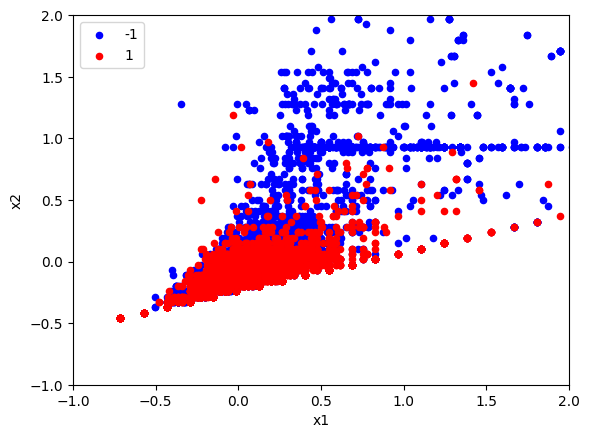

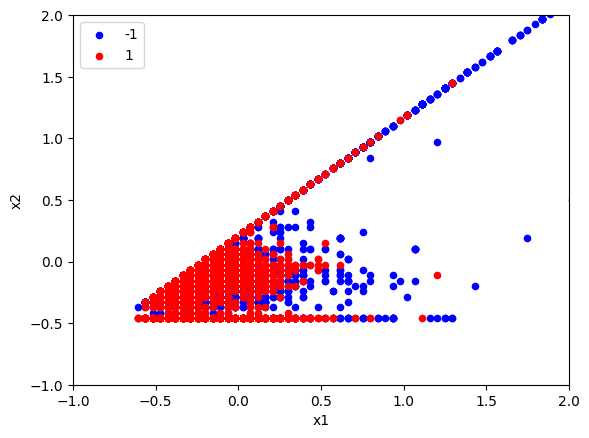

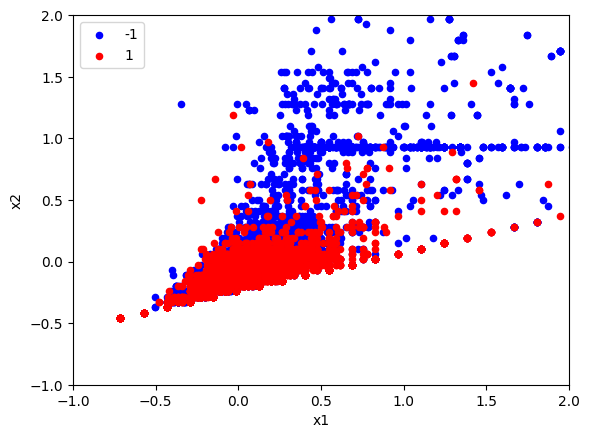

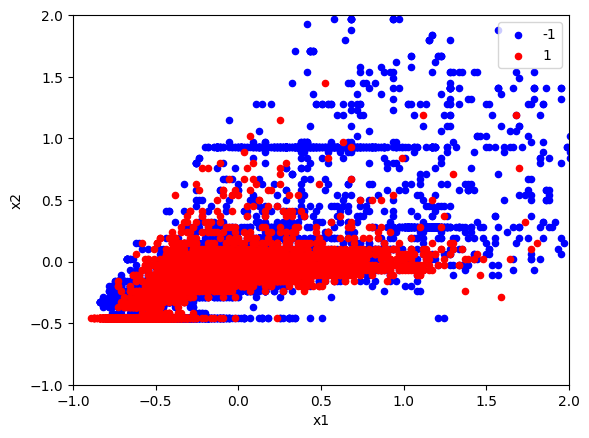

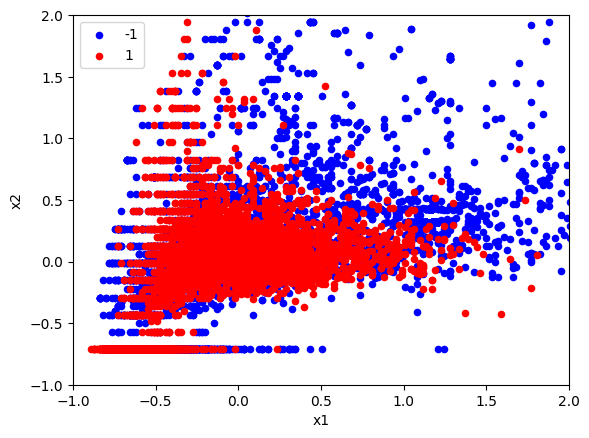

In [18]:
#Diferentes gráficas. Limita a -1 a 2 para ver una mejor vista a los datos. 
df = pd.DataFrame(dict(x1=X['avg_word_path'], x2=X['longest_word_path'], y=y))
colors = {1:'red', -1:'blue'}
fig, ax = plt.subplots()
grouped = df.groupby('y')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x1', y='x2', label=key, color = colors[key])
plt.xlim([-1, 2])
plt.ylim([-1, 2])
plt.show()

df = pd.DataFrame(dict(x1=X['longest_words_raw'], x2=X['longest_word_path'], y=y))
colors = {1:'red', -1:'blue'}
fig, ax = plt.subplots()
grouped = df.groupby('y')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x1', y='x2', label=key, color = colors[key])
plt.xlim([-1, 2])
plt.ylim([-1, 2])
plt.show()

df = pd.DataFrame(dict(x1=X['avg_word_path'], x2=X['longest_word_path'], y=y))
colors = {1:'red', -1:'blue'}
fig, ax = plt.subplots()
grouped = df.groupby('y')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x1', y='x2', label=key, color = colors[key])
plt.xlim([-1, 2])
plt.ylim([-1, 2])
plt.show()

df = pd.DataFrame(dict(x1=X['length_url'], x2=X['longest_word_path'], y=y))
colors = {1:'red', -1:'blue'}
fig, ax = plt.subplots()
grouped = df.groupby('y')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x1', y='x2', label=key, color = colors[key])
plt.xlim([-1, 2])
plt.ylim([-1, 2])
plt.show()

df = pd.DataFrame(dict(x1=X['length_url'], x2=X['avg_word_path'], y=y))
colors = {1:'red', -1:'blue'}
fig, ax = plt.subplots()
grouped = df.groupby('y')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x1', y='x2', label=key, color = colors[key])
plt.xlim([-1, 2])
plt.ylim([-1, 2])
plt.show()


In [19]:
#Prueba del SVM
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split 
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
svm = SVM(kernel="linear", C=1)


svm.fit(X_train, y_train)
prediction = svm.predict(X_test)

#Metricas de desempeño 
print("Accuracy:", accuracy_score(prediction, y_test))

Accuracy: 0.6176727909011374


In [20]:
#Prueba del kernel de poly
svm1 = SVM(kernel="poly", C=20,degree=6)

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
svm1.fit(X_train, y_train)

prediction = svm1.predict(X_test)
print("Accuracy:", accuracy_score(prediction, y_test))

Accuracy: 0.5135608048993876


In [39]:
# Uso de librerias 

from sklearn.svm import SVC
clf = SVC(kernel='poly', degree=2, C =10)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
clf.fit(X_train, y_train)
print("Accuracy:", accuracy_score(clf.predict(X_test), y_test))

Accuracy: 0.6290463692038495


In [40]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.01, 0.1, 1, 2, 3, 4, 5, 10], 
              'kernel': ['linear', 'poly'],
              'degree': [2, 3, 4, 5],}

In [41]:
from typing import Iterable, Any
from itertools import product
#Función para hacer Grid Search
def grid_parameters(parameters: dict[str, Iterable[Any]]) -> Iterable[dict[str, Any]]:
    for params in product(*parameters.values()):
        yield dict(zip(parameters.keys(), params))

bestacc = 0
params = 0
for x in grid_parameters(param_grid):
    print(x)
    svm = SVM(**x)
    #Grid serach, con los datos del training y validation
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
    X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
    svm.fit(X_train, y_train)
    #Mira cual es el accuray más alto, y devuelve esos datos al final
    print("Accuracy:", accuracy_score(svm.predict(X_valid), y_valid))
    if accuracy_score(svm.predict(X_valid), y_valid) > bestacc:
        bestacc = accuracy_score(svm.predict(X_valid), y_valid)
        params = x

{'C': 0.01, 'kernel': 'linear', 'degree': 2}
Accuracy: 0.6194225721784777
{'C': 0.01, 'kernel': 'linear', 'degree': 3}
Accuracy: 0.6097987751531059
{'C': 0.01, 'kernel': 'linear', 'degree': 4}
Accuracy: 0.6167979002624672
{'C': 0.01, 'kernel': 'linear', 'degree': 5}
Accuracy: 0.6097987751531059
{'C': 0.01, 'kernel': 'poly', 'degree': 2}
Accuracy: 0.6281714785651793
{'C': 0.01, 'kernel': 'poly', 'degree': 3}
Accuracy: 0.6202974628171478
{'C': 0.01, 'kernel': 'poly', 'degree': 4}
Accuracy: 0.5730533683289589
{'C': 0.01, 'kernel': 'poly', 'degree': 5}
Accuracy: 0.6185476815398075
{'C': 0.1, 'kernel': 'linear', 'degree': 2}
Accuracy: 0.6281714785651793
{'C': 0.1, 'kernel': 'linear', 'degree': 3}
Accuracy: 0.6307961504811899
{'C': 0.1, 'kernel': 'linear', 'degree': 4}
Accuracy: 0.6342957130358705
{'C': 0.1, 'kernel': 'linear', 'degree': 5}
Accuracy: 0.6351706036745407
{'C': 0.1, 'kernel': 'poly', 'degree': 2}
Accuracy: 0.6386701662292213
{'C': 0.1, 'kernel': 'poly', 'degree': 3}
Accuracy: 0

Pruebas para corroborar el funcionamiento correcto del código

In [42]:
# print(params, bestacc)
# svm = SVM(**params)
# X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
# X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
# svm.fit(X_train, y_train)
# print("Accuracy:", accuracy_score(svm.predict(X_train), y_train))

{'C': 10, 'kernel': 'poly', 'degree': 5} 0.6614173228346457
Accuracy: 0.5967847769028871


In [44]:
# def RBF(X, gamma=None):
# # En el casa que gamma no sea dada
#     if gamma == None:
#         gamma = 1000
        
#     print(X.shape)
#     # Ecuación del kernel RBF
#     K = np.exp(-gamma * np.sum((X - X[:, np.newaxis])**2, axis = -1))
#     print(K.shape)
    
#     return K

In [28]:
#Función para el RBF kernel. Funciona solo para el training pero no para tests. Alberto menciono que estaba bien solo así que ya vio.
#import numpy as np
#import matplotlib.pyplot as plt
#import pandas as pd
#from sklearn.datasets import make_circles
#X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
#X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

#svm2 = SVM()
#svm2.fit(RBF(X_train.to_numpy()), y_train.to_numpy())
#prediction = svm2.predict(RBF(X_test.to_numpy()))

# Loss value
#print("Accuracy:", accuracy_score(prediction, y_test))
